<a href="https://colab.research.google.com/github/sexymonster/Projects/blob/main/TeamProject/TomatoDataCustom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-Processing

In [ ]:
from google.colab import drive
import glob,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/tomato/"

In [ ]:
file_list = os.listdir(path)
print(file_list)

['2020_0010076_01', '2021_0010056_03', '2019_0010057_01', '2021_0010056_01', '2020_0020738_01', '2021_0010056_02', '2020_0010070_01', '2020_0010057_01', '2019_0010071_01', '2021_0010070_01', '2021_0020738_01', '2021_0010071_01', '2021_0010076_01', '2021_0010071_02', '2021_0020760_01']


In [ ]:
def dataset(file, path=path):
  try:
    live = pd.read_excel(path + file+ "/방울토마토_생육정보_일별.xlsx")
    live = live.rename(columns = live.iloc[0])
    live = live.drop(live.index[0])
  except:
    pass

  ctrl = pd.read_excel(path + file+ "/방울토마토_제어정보_일별.xlsx")
  ctrl = ctrl.rename(columns = ctrl.iloc[0])
  ctrl = ctrl.drop(ctrl.index[0])

  env = pd.read_excel(path + file+ "/방울토마토_환경정보_일별.xlsx")
  env = env.rename(columns = env.iloc[0])
  env = env.drop(env.index[0])
  env = env.drop(env.columns[[3,5,6,9,10,11,13,14,19]], axis = 1)

  try:
    return live, ctrl, env
  except:
    return ctrl,env

In [ ]:
# 모든 데이터 불러오기
file_list = os.listdir(path)

i = 1

for file in file_list:
  try:
    globals()["live"+str(i)], globals()["ctrl"+str(i)], globals()["env"+str(i)]  = dataset(file,path)
  except:
    globals()["ctrl"+str(i)], globals()["env"+str(i)]  = dataset(file,path)

  i += 1
print(i-1, '개의 농장 데이터가 있습니다.')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


15 개의 농장 데이터가 있습니다.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 4.1 MB/s 
     |████████████████████████████████| 690 kB 49.0 MB/s 
     |████████████████████████████████| 102 kB 57.7 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 42.7 MB/s 
     |████████████████████████████████| 4.7 MB 44.1 MB/s 
     |████████████████████████████████| 296 kB 47.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=01c0548c0fbcef224e7988c1bb24ccb5cb47731a4ae79a97f295cd33fb8216a5
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
   

In [ ]:
def effcolm(df):
  effective = []
  columns = list(df)

  # 유효한 컬럼 추출 (nan값 개수가 1/3 이하인 컬럼)
  for col in columns:
    num_nan = df[col].isnull().sum()

    if num_nan < len(df[col])/3:
      effective.append(col)
  
  # 전부 0으로 표기된 의미 없는 컬럼도 제거
  for col in effective:
    if len(df[col].unique()) == 1:
      effective.remove(col) 


  return effective
  

In [ ]:
ctrl3

,수집일,좌측일중천창 작동여부,우측일중천창 작동여부,좌측이중천창 작동여부,우측이중천창 작동여부,좌측일중측창 작동여부,우측일중측창 작동여부,좌측이중측창 작동여부,우측이중측창 작동여부,좌측삼중측창 작동여부,...,유동팬작동상태,난방기작동여부,보광등작동상태,CO2발생장치작동여부,CO2발생장치작동상태,3WAY벨브공급수온도(도),배기팬작동여부,배기팬작동상태,훈증기작동상태,보일러 작동여부
1,2019-12-24,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-25,0.0,1.78,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-26,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-27,0.36,1.39,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-12-28,0.44,2.44,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-12-29,0.0,0.38,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-12-30,1.98,0.96,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-12-31,1.41,0.12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-01-01,1.28,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2020-01-02,1.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ctrl3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   수집일             33 non-null     object
 1   좌측일중천창 작동여부     33 non-null     object
 2   우측일중천창 작동여부     33 non-null     object
 3   좌측이중천창 작동여부     33 non-null     object
 4   우측이중천창 작동여부     0 non-null      object
 5   좌측일중측창 작동여부     0 non-null      object
 6   우측일중측창 작동여부     0 non-null      object
 7   좌측이중측창 작동여부     0 non-null      object
 8   우측이중측창 작동여부     0 non-null      object
 9   좌측삼중측창 작동여부     0 non-null      object
 10  우측삼중측창 작동여부     0 non-null      object
 11  차광커튼작동여부        0 non-null      object
 12  차광커튼작동상태        33 non-null     object
 13  보온커튼작동여부        0 non-null      object
 14  유동팬작동여부         0 non-null      object
 15  유동팬작동상태         0 non-null      object
 16  난방기작동여부         0 non-null      object
 17  보광등작동상태         0 non-null      object
 18  CO2발생장치작동여부 

In [ ]:
aa = effcolm(ctrl3)
print(aa)

['수집일', '좌측일중천창 작동여부', '우측일중천창 작동여부', '차광커튼작동상태']


ctrl3의 컬럼중에 값이 채워진 컬럼이 5개 있고, "좌측이중천창 작동여부" 컬럼은 전부 0.0으로 채워진 의미 없는 값이기 때문에 effcolm함수가 잘 작동 하고 있다고 판단 할 수 있음

In [ ]:
new_df = ctrl3[aa]
new_df

,수집일,좌측일중천창 작동여부,우측일중천창 작동여부,차광커튼작동상태
1,2019-12-24,0.0,0.0,12.89
2,2019-12-25,0.0,1.78,24.12
3,2019-12-26,0.0,0.0,25.46
4,2019-12-27,0.36,1.39,23.4
5,2019-12-28,0.44,2.44,22.46
6,2019-12-29,0.0,0.38,26.06
7,2019-12-30,1.98,0.96,25.88
8,2019-12-31,1.41,0.12,21.41
9,2020-01-01,1.28,0.0,20.04
10,2020-01-02,1.5,0.0,23.26


In [ ]:
env3

,수집일,내부CO2(ppm),이슬점온도(도),토양EC(dS/m),내부습도(%),지습(%),강우감지,일사량(W/m-2·s),외부온도(도),내부온도(도),지온(도),외부풍속(m/s)
1,2019-12-24,284.44,NaN,NaN,83.22,NaN,0.0,0.42,1.09,11.58,NaN,0.57
2,2019-12-25,411.51,NaN,NaN,84.8,NaN,0.0,66.41,2.18,14.1,NaN,0.86
3,2019-12-26,424.04,NaN,NaN,89.44,NaN,0.19,16.37,3.98,12.2,NaN,1.29
4,2019-12-27,367.24,NaN,NaN,83.28,NaN,0.0,108.61,0.81,14.44,NaN,0.7
5,2019-12-28,353.65,NaN,NaN,82.62,NaN,0.0,105.49,-0.15,14.3,NaN,0.39
6,2019-12-29,392.29,NaN,NaN,87.9,NaN,0.4,37.29,2.02,12.94,NaN,1.07
7,2019-12-30,432.46,NaN,NaN,90.14,NaN,0.11,29.97,4.92,12.91,NaN,0.96
8,2019-12-31,365.54,NaN,NaN,82.94,NaN,0.0,113.95,-3.85,13.97,NaN,1.46
9,2020-01-01,352.02,NaN,NaN,86.28,NaN,0.0,72.82,-2.16,13.34,NaN,0.49
10,2020-01-02,349.51,NaN,NaN,85.71,NaN,0.0,51.85,0.05,13.0,NaN,0.45


In [ ]:
env3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   수집일           33 non-null     object
 1   내부CO2(ppm)    33 non-null     object
 2   이슬점온도(도)      0 non-null      object
 3   토양EC(dS/m)    0 non-null      object
 4   내부습도(%)       33 non-null     object
 5   지습(%)         0 non-null      object
 6   강우감지          33 non-null     object
 7   일사량(W/m-2·s)  33 non-null     object
 8   외부온도(도)       33 non-null     object
 9   내부온도(도)       33 non-null     object
 10  지온(도)         0 non-null      object
 11  외부풍속(m/s)     33 non-null     object
dtypes: object(12)
memory usage: 3.4+ KB


In [ ]:
ab = effcolm(env3)
print(ab)

['수집일', '내부CO2(ppm)', '내부습도(%)', '강우감지', '일사량(W/m-2·s)', '외부온도(도)', '내부온도(도)', '외부풍속(m/s)']


In [ ]:
new_env_df = env3[ab]
new_env_df

,수집일,내부CO2(ppm),내부습도(%),강우감지,일사량(W/m-2·s),외부온도(도),내부온도(도),외부풍속(m/s)
1,2019-12-24,284.44,83.22,0.0,0.42,1.09,11.58,0.57
2,2019-12-25,411.51,84.8,0.0,66.41,2.18,14.1,0.86
3,2019-12-26,424.04,89.44,0.19,16.37,3.98,12.2,1.29
4,2019-12-27,367.24,83.28,0.0,108.61,0.81,14.44,0.7
5,2019-12-28,353.65,82.62,0.0,105.49,-0.15,14.3,0.39
6,2019-12-29,392.29,87.9,0.4,37.29,2.02,12.94,1.07
7,2019-12-30,432.46,90.14,0.11,29.97,4.92,12.91,0.96
8,2019-12-31,365.54,82.94,0.0,113.95,-3.85,13.97,1.46
9,2020-01-01,352.02,86.28,0.0,72.82,-2.16,13.34,0.49
10,2020-01-02,349.51,85.71,0.0,51.85,0.05,13.0,0.45


In [ ]:
print(new_env_df.corr())

Empty DataFrame
Columns: []
Index: []


In [ ]:
new_env_df['Date'] = pd.to_datetime(new_env_df['수집일'])
ba = new_env_df[["Date","외부온도(도)","내부온도(도)"]]

bb = ba.set_index(keys="Date", drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     33 non-null     datetime64[ns]
 1   외부온도(도)  33 non-null     object        
 2   내부온도(도)  33 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.0+ KB


In [ ]:
print(ba.dtypes)

Date       datetime64[ns]
외부온도(도)            object
내부온도(도)            object
dtype: object


In [ ]:
bc = ba.astype({'외부온도(도)':'float'})
bc = bc.astype({'내부온도(도)':'float'})

In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     33 non-null     datetime64[ns]
 1   외부온도(도)  33 non-null     float64       
 2   내부온도(도)  33 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.0 KB


In [ ]:
bd = bc.set_index(keys="Date", drop=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_

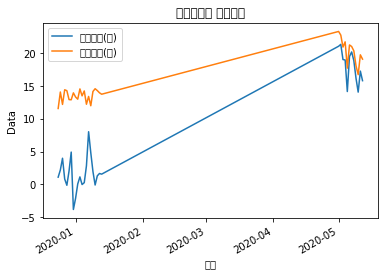

In [ ]:
bd.plot()
plt.title("실내온도와 실외온도")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

In [ ]:
dic = {}
for i in range(1,16):
  globals()["eff_ctrl"+str(i)] = effcolm(globals()["ctrl"+str(i)])
  # print(globals()["eff_ctrl"+str(i)])
  

In [ ]:
class CustomDataset:

  def __init__(self, file, path =path):
    self.path = path
    self.file = file

    live = pd.read_excel(self.path + self.file+ "/방울토마토_생육정보_일별.xlsx")
    ctrl = pd.read_excel(self.path + self.file+ "/방울토마토_제어정보_일별.xlsx")
    env = pd.read_excel(self.path + self.file+ "/방울토마토_환경정보_일별.xlsx")

  def pre_pro(self):

    self.live = self.live.rename(columns=self.live.iloc[0])
    self.live = self.live.drop(live.index[0])
    live = self.live
    
    return live


# Modeling

## live -env

In [ ]:
# 임의의 live 데이터 프레임 가져오기
live4 

,조사일,주차,생장길이(cm),화방높이(cm),줄기굵기(mm),엽장(cm),엽폭(cm),엽수(개),개화군(점),착과군(점),열매수(개),최종화방번호(번)
1,2022-01-03,3,0.0,48.75,3.68,134.0,133.25,7.25,0.15,0.0,0.0,1.0
2,2022-01-10,4,93.25,142.0,5.38,187.5,195.5,7.0,0.3,0.1,0.5,1.0
3,2022-01-17,5,169.5,301.25,5.65,237.5,259.0,6.5,0.5,0.1,1.5,1.0
4,2022-01-24,6,185.0,216.0,8.03,312.0,354.75,5.0,1.15,0.35,3.5,2.0
5,2022-01-31,7,156.0,170.0,6.93,364.75,353.75,6.5,2.05,1.05,7.75,2.75
6,2022-02-07,8,157.75,250.25,8.98,423.25,492.25,7.0,2.45,1.48,13.5,3.0
7,2022-02-14,9,169.0,140.25,7.9,385.5,310.25,6.0,3.13,2.25,19.75,4.0
8,2022-02-21,10,161.25,267.75,9.58,434.25,456.25,6.0,3.28,2.28,25.5,4.0
9,2022-02-28,11,190.5,154.75,6.9,363.5,302.5,8.5,4.15,3.15,34.25,5.0
10,2022-03-07,12,198.0,98.5,5.08,267.0,215.5,7.5,5.1,4.1,43.0,6.0


In [ ]:
ran_df = live4.iloc[:,1:-1] 
ran_df

,주차,생장길이(cm),화방높이(cm),줄기굵기(mm),엽장(cm),엽폭(cm),엽수(개),개화군(점),착과군(점),열매수(개)
1,3,0.0,48.75,3.68,134.0,133.25,7.25,0.15,0.0,0.0
2,4,93.25,142.0,5.38,187.5,195.5,7.0,0.3,0.1,0.5
3,5,169.5,301.25,5.65,237.5,259.0,6.5,0.5,0.1,1.5
4,6,185.0,216.0,8.03,312.0,354.75,5.0,1.15,0.35,3.5
5,7,156.0,170.0,6.93,364.75,353.75,6.5,2.05,1.05,7.75
6,8,157.75,250.25,8.98,423.25,492.25,7.0,2.45,1.48,13.5
7,9,169.0,140.25,7.9,385.5,310.25,6.0,3.13,2.25,19.75
8,10,161.25,267.75,9.58,434.25,456.25,6.0,3.28,2.28,25.5
9,11,190.5,154.75,6.9,363.5,302.5,8.5,4.15,3.15,34.25
10,12,198.0,98.5,5.08,267.0,215.5,7.5,5.1,4.1,43.0


In [ ]:
ran_df.corr()["열매수(개)"]

KeyError: ignored

## ctrl - env